In [60]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (15, 3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'
#import seaborn
import pickle
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA

In [3]:
with open('station_df.pickle', 'rb') as handle:
    station_df = pickle.load(handle)

# K-mean clustering for separating the stations in different cities

In [5]:
# preparing the data
data = station_df[['Duration', 'customer_ratio', 'trips_all_year', 'dockcount']]

In [7]:
# scaling the data
data = scale(data)

In [12]:
labels = station_df['landmark']
len(np.unique(labels))

5

trying three methods of k-mean clustering to see which gives the best result

In [25]:
# one method is to reduce dimensionality of the data by a principant component analyis
pca = PCA().fit(data)

In [26]:
# looks like the 4th variable hardly explains anything 
print(pca.explained_variance_ratio_) 

[ 0.53200929  0.24044371  0.15580942  0.07173758]


In [28]:
pca = PCA(n_components=3).fit(data)
print(pca.explained_variance_ratio_) 

[ 0.53200929  0.24044371  0.15580942]


In [30]:
# building and comparing the models
estimator = KMeans(init='k-means++', n_clusters=5, n_init=10)
estimator_rand = KMeans(init='random', n_clusters=5, n_init=10)
estimator_pca = KMeans(init=pca.components_, n_clusters=5, n_init=1)

In [31]:
estimator.fit(data)
estimator_rand.fit(data)
estimator_pca.fit(data)

KMeans(copy_x=True,
    init=array([[ 0.56019,  0.51648, -0.47657, -0.43854],
       [-0.39388, -0.51876, -0.49998, -0.57076],
       [ 0.30169, -0.34633, -0.61262,  0.64323]]),
    max_iter=300, n_clusters=3, n_init=1, n_jobs=1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [32]:
# the random model proved to be the best
print ('k-means++ ', metrics.completeness_score(labels, estimator.labels_))
print ('random ', metrics.completeness_score(labels, estimator_rand.labels_)) 
print ('pca ', metrics.completeness_score(labels, estimator_pca.labels_)) 

k-means++  0.19886371747
random  0.372067651328
pca  0.270514127571


In [33]:
print ('k-means++ ', metrics.v_measure_score(labels, estimator.labels_))
print ('random ', metrics.v_measure_score(labels, estimator_rand.labels_)) 
print ('pca ', metrics.v_measure_score(labels, estimator_pca.labels_)) 

k-means++  0.1927629911
random  0.392561041981
pca  0.220800731517


looking at the clusters and comparing them to the original labels

In [56]:
station_df['kmean_landmark'] = estimator_rand.labels_

In [69]:
print (' Duration   ', 'customer_ratio', 'trips_all_year', 'dockcount')
print (estimator_rand.cluster_centers_)

 Duration    customer_ratio trips_all_year dockcount
[[-0.12541328 -0.18815936 -0.76202121 -0.80433061]
 [-0.57089548 -0.38080819  1.90595074  1.59300515]
 [ 0.15257136 -0.11789852 -0.51301392  1.04884799]
 [ 2.70641792  2.17019804 -0.85622139 -0.83477297]
 [-0.48832308 -0.20092885  0.58228892 -0.11937754]]


In [70]:
station_df.groupby(['kmean_landmark', 'landmark']).count()

station_id  name  lat  long  dockcount  \
kmean_landmark landmark                                                
0              Mountain View           4     4    4     4          4   
               Palo Alto               1     1    1     1          1   
               Redwood City            5     5    5     5          5   
               San Francisco           2     2    2     2          2   
               San Jose               10    10   10    10         10   
1              San Francisco           8     8    8     8          8   
2              Mountain View           2     2    2     2          2   
               Palo Alto               1     1    1     1          1   
               Redwood City            1     1    1     1          1   
               San Francisco           3     3    3     3          3   
               San Jose                5     5    5     5          5   
3              Mountain View           1     1    1     1          1   
               Palo Alto               3     3    3     3          3   
               Redwood City            1     1    1     1          1   
               San Jose                1     1    1     1          1   
4              San Francisco          22    22   22    22         22   

                              installation  Start Station  End Station  \
kmean_landmark landmark                                                  
0              Mountain View             4              4            4   
               Palo Alto                 1              1            1   
               Redwood City              5              5            5   
               San Francisco             2              2            2   
               San Jose                 10             10           10   
1              San Francisco             8              8            8   
2              Mountain View             2              2            2   
               Palo Alto                 1              1            1   
               Redwood City              1              1            1   
               San Francisco             3              3            3   
               San Jose                  5              5            5   
3              Mountain View             1              1            1   
               Palo Alto                 3              3            3   
               Redwood City              1              1            1   
               San Jose                  1              1            1   
4              San Francisco            22             22           22   

                              trips_all_year  customer_ratio  Duration  
kmean_landmark landmark                                                 
0              Mountain View               4               4         4  
               Palo Alto                   1               1         1  
               Redwood City                5               5         5  
               San Francisco               2               2         2  
               San Jose                   10              10        10  
1              San Francisco               8               8         8  
2              Mountain View               2               2         2  
               Palo Alto                   1               1         1  
               Redwood City                1               1         1  
               San Francisco               3               3         3  
               San Jose                    5               5         5  
3              Mountain View               1               1         1  
               Palo Alto                   3               3         3  
               Redwood City                1               1         1  
               San Jose                    1               1         1  
4              San Francisco              22              22        22

([], <a list of 0 Text yticklabel objects>)

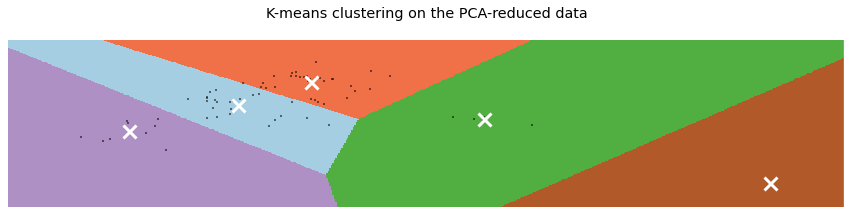

In [63]:
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the PCA-reduced data\n')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# let's see if using only two clusters would separate San Francisco from the smaller cities

([], <a list of 0 Text yticklabel objects>)

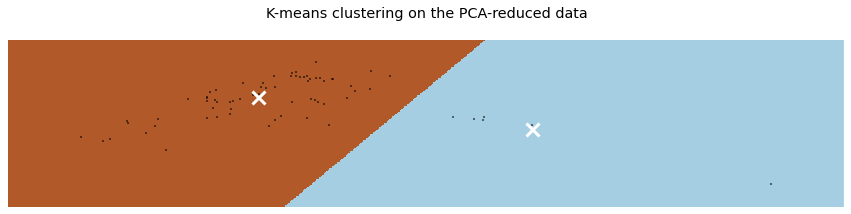

In [72]:
# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the PCA-reduced data\n')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [75]:
estimator_two = KMeans(init='k-means++', n_clusters=2, n_init=10)
estimator_rand_two = KMeans(init='random', n_clusters=2, n_init=10)
estimator_pca_two = KMeans(init=pca.components_, n_clusters=2, n_init=1)

estimator_two.fit(data)
estimator_rand_two.fit(data)
estimator_pca_two.fit(data)

print ('k-means++ ', metrics.completeness_score(labels, estimator_two.labels_))
print ('random ', metrics.completeness_score(labels, estimator_rand_two.labels_)) 
print ('pca ', metrics.completeness_score(labels, estimator_pca_two.labels_)) 

k-means++  0.372552801756
random  0.372552801756
pca  0.270514127571


In [77]:
print (' Duration   ', 'customer_ratio', 'trips_all_year', 'dockcount')
print (estimator_rand_two.cluster_centers_)

 Duration    customer_ratio trips_all_year dockcount
[[ 2.70641792  2.17019804 -0.85622139 -0.83477297]
 [-0.25372668 -0.20345607  0.08027076  0.07825997]]


In [76]:
station_df['two_cluster_landmark'] = estimator_rand_two.labels_
station_df.groupby(['two_cluster_landmark', 'landmark']).count()

station_id  name  lat  long  dockcount  \
two_cluster_landmark landmark                                                
0                    Mountain View           1     1    1     1          1   
                     Palo Alto               3     3    3     3          3   
                     Redwood City            1     1    1     1          1   
                     San Jose                1     1    1     1          1   
1                    Mountain View           6     6    6     6          6   
                     Palo Alto               2     2    2     2          2   
                     Redwood City            6     6    6     6          6   
                     San Francisco          35    35   35    35         35   
                     San Jose               15    15   15    15         15   

                                    installation  Start Station  End Station  \
two_cluster_landmark landmark                                                  
0                    Mountain View             1              1            1   
                     Palo Alto                 3              3            3   
                     Redwood City              1              1            1   
                     San Jose                  1              1            1   
1                    Mountain View             6              6            6   
                     Palo Alto                 2              2            2   
                     Redwood City              6              6            6   
                     San Francisco            35             35           35   
                     San Jose                 15             15           15   

                                    trips_all_year  customer_ratio  Duration  \
two_cluster_landmark landmark                                                  
0                    Mountain View               1               1         1   
                     Palo Alto                   3               3         3   
                     Redwood City                1               1         1   
                     San Jose                    1               1         1   
1                    Mountain View               6               6         6   
                     Palo Alto                   2               2         2   
                     Redwood City                6               6         6   
                     San Francisco              35              35        35   
                     San Jose                   15              15        15   

                                    kmean_landmark  
two_cluster_landmark landmark                       
0                    Mountain View               1  
                     Palo Alto                   3  
                     Redwood City                1  
                     San Jose                    1  
1                    Mountain View               6  
                     Palo Alto                   2  
                     Redwood City                6  
                     San Francisco              35  
                     San Jose                   15

No, it didn't separate San Francisco but looks like that there are 6 stations wich are different from the others
These are small stations (small dock count) not frequently used, 
but the ratio of the customers compared to the subscribers and the average bike rental duration is relly high

### let's see if using 3 clusters gives more insides

([], <a list of 0 Text yticklabel objects>)

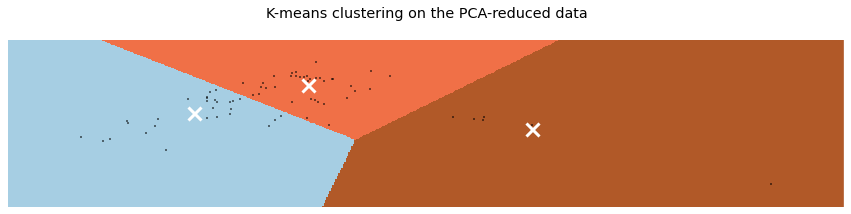

In [78]:
# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the PCA-reduced data\n')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [79]:
estimator_three = KMeans(init='k-means++', n_clusters=3, n_init=10)
estimator_rand_three = KMeans(init='random', n_clusters=3, n_init=10)
estimator_pca_three = KMeans(init=pca.components_, n_clusters=3, n_init=1)

estimator_three.fit(data)
estimator_rand_three.fit(data)
estimator_pca_three.fit(data)

print ('k-means++ ', metrics.completeness_score(labels, estimator_three.labels_))
print ('random ', metrics.completeness_score(labels, estimator_rand_three.labels_)) 
print ('pca ', metrics.completeness_score(labels, estimator_pca_three.labels_)) 

k-means++  0.333690742971
random  0.333690742971
pca  0.270514127571


In [86]:
print (' Duration   ', 'customer_ratio', 'trips_all_year', 'dockcount')
print (estimator_rand_three.cluster_centers_)

 Duration    customer_ratio trips_all_year dockcount
[[-0.45420839 -0.30019578  0.88487324  0.82161752]
 [-0.09779646 -0.12821406 -0.54553118 -0.49990702]
 [ 2.70641792  2.17019804 -0.85622139 -0.83477297]]


In [81]:
station_df['three_cluster_landmark'] = estimator_rand_three.labels_
station_df.groupby(['three_cluster_landmark', 'landmark']).count()

station_id  name  lat  long  dockcount  \
three_cluster_landmark landmark                                                
0                      Mountain View           1     1    1     1          1   
                       Redwood City            1     1    1     1          1   
                       San Francisco          25    25   25    25         25   
                       San Jose                1     1    1     1          1   
1                      Mountain View           5     5    5     5          5   
                       Palo Alto               2     2    2     2          2   
                       Redwood City            5     5    5     5          5   
                       San Francisco          10    10   10    10         10   
                       San Jose               14    14   14    14         14   
2                      Mountain View           1     1    1     1          1   
                       Palo Alto               3     3    3     3          3   
                       Redwood City            1     1    1     1          1   
                       San Jose                1     1    1     1          1   

                                      installation  Start Station  \
three_cluster_landmark landmark                                     
0                      Mountain View             1              1   
                       Redwood City              1              1   
                       San Francisco            25             25   
                       San Jose                  1              1   
1                      Mountain View             5              5   
                       Palo Alto                 2              2   
                       Redwood City              5              5   
                       San Francisco            10             10   
                       San Jose                 14             14   
2                      Mountain View             1              1   
                       Palo Alto                 3              3   
                       Redwood City              1              1   
                       San Jose                  1              1   

                                      End Station  trips_all_year  \
three_cluster_landmark landmark                                     
0                      Mountain View            1               1   
                       Redwood City             1               1   
                       San Francisco           25              25   
                       San Jose                 1               1   
1                      Mountain View            5               5   
                       Palo Alto                2               2   
                       Redwood City             5               5   
                       San Francisco           10              10   
                       San Jose                14              14   
2                      Mountain View            1               1   
                       Palo Alto                3               3   
                       Redwood City             1               1   
                       San Jose                 1               1   

                                      customer_ratio  Duration  \
three_cluster_landmark landmark                                  
0                      Mountain View               1         1   
                       Redwood City                1         1   
                       San Francisco              25        25   
                       San Jose                    1         1   
1                      Mountain View               5         5   
                       Palo Alto                   2         2   
                       Redwood City                5         5   
                       San Francisco              10        10   
                       San Jose                   14        14   
2                      Mountain View   

We still have the cluster with the small stations, used mainly by customers
Considering the other two clusters, the first are the "San Francisco" - style stations. They are large stations, used a lot, mainly by subscribers for short trips.
The remaining cluster contains stations from all cities with medium values on all dimensions

In [87]:
san_francisco_like = station_df[station_df['three_cluster_landmark'] == 0]
small = station_df[station_df['three_cluster_landmark'] == 2]
other = station_df[station_df['three_cluster_landmark'] == 1]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x110dceda0>], dtype=object)

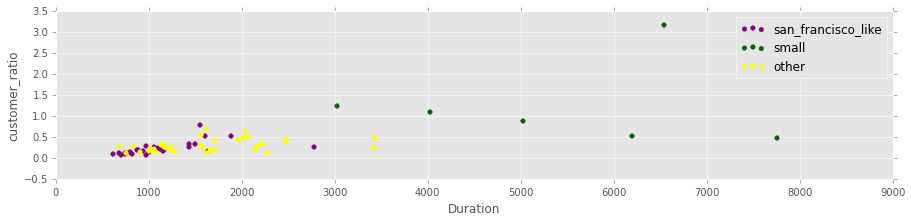

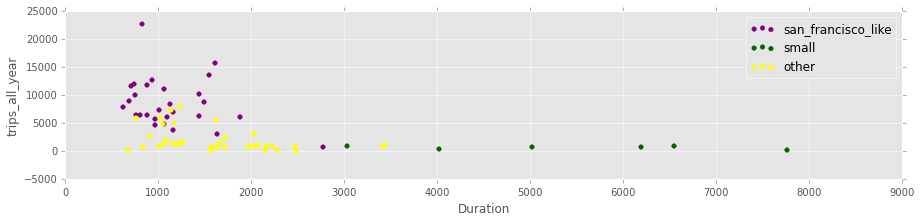

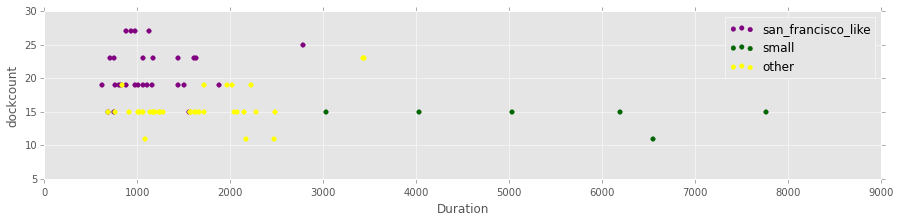

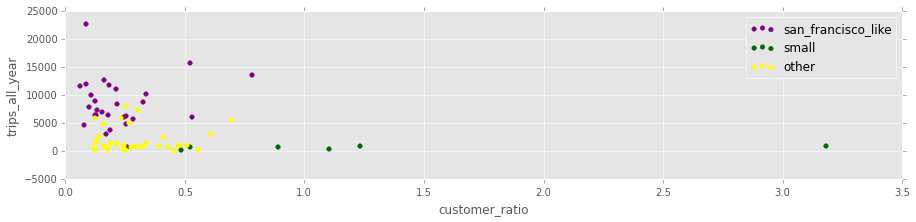

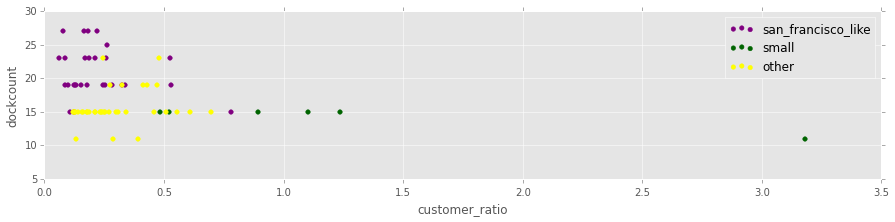

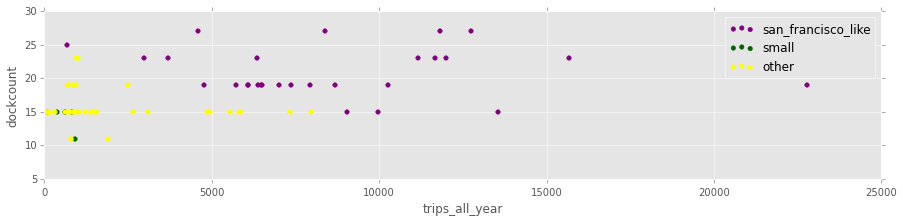

In [97]:
ax = san_francisco_like.plot(kind='scatter', x='Duration', y='customer_ratio', color='purple', label='san_francisco_like')
ax = small.plot(kind='scatter', x='Duration', y='customer_ratio', color='DarkGreen', label='small', ax=ax)
other.plot(kind='scatter', x='Duration', y='customer_ratio', color='yellow', label='other', ax=ax, subplots=True)

bx = san_francisco_like.plot(kind='scatter', x='Duration', y='trips_all_year', color='purple', label='san_francisco_like')
bx = small.plot(kind='scatter', x='Duration', y='trips_all_year', color='DarkGreen', label='small', ax=bx)
other.plot(kind='scatter', x='Duration', y='trips_all_year', color='yellow', label='other', ax=bx, subplots=True)

cx = san_francisco_like.plot(kind='scatter', x='Duration', y='dockcount', color='purple', label='san_francisco_like')
cx = small.plot(kind='scatter', x='Duration', y='dockcount', color='DarkGreen', label='small', ax=cx)
other.plot(kind='scatter', x='Duration', y='dockcount', color='yellow', label='other', ax=cx, subplots=True)

dx = san_francisco_like.plot(kind='scatter', x='customer_ratio', y='trips_all_year', color='purple', label='san_francisco_like')
dx = small.plot(kind='scatter', x='customer_ratio', y='trips_all_year', color='DarkGreen', label='small', ax=dx)
other.plot(kind='scatter', x='customer_ratio', y='trips_all_year', color='yellow', label='other', ax=dx, subplots=True, xlim=(0,3.5))

ex = san_francisco_like.plot(kind='scatter', x='customer_ratio', y='dockcount', color='purple', label='san_francisco_like')
ex = small.plot(kind='scatter', x='customer_ratio', y='dockcount', color='DarkGreen', label='small', ax=ex)
other.plot(kind='scatter', x='customer_ratio', y='dockcount', color='yellow', label='other', ax=ex, subplots=True, xlim=(0,3.5))

fx = san_francisco_like.plot(kind='scatter', x='trips_all_year', y='dockcount', color='purple', label='san_francisco_like')
fx = small.plot(kind='scatter', x='trips_all_year', y='dockcount', color='DarkGreen', label='small', ax=fx)
other.plot(kind='scatter', x='trips_all_year', y='dockcount', color='yellow', label='other', ax=fx, subplots=True, xlim=(0,25000))